In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [55]:
data = pd.ExcelFile('PATIENT2.xlsx')
data0 = pd.ExcelFile('CONTROL2.xlsx')

AAo = pd.read_excel(data,"AAo")
AAo0 = pd.read_excel(data0,"AAo")
AArch = pd.read_excel(data,"AArch")
AArch0 = pd.read_excel(data0,"AArch")

AAo = AAo.drop(["Diameter"], axis=1)
AAo = AAo.drop(AAo[AAo["Classification"]==3].index)
AAo0 = AAo0.drop(["Diameter"], axis=1)
AAo0 = AAo0.drop(AAo0[AAo0["Classification"]==3].index)

AArch = AArch.drop(["Diameter"], axis=1)
AArch = AArch.drop(AArch[AArch["Classification"]==3].index)
AArch0 = AArch0.drop(["Diameter"], axis=1)
AArch0 = AArch0.drop(AArch0[AArch0["Classification"]==3].index)

AAo_and_AArch = pd.concat([AAo, AArch], axis = 0)
Control_AAo_and_AArch = pd.concat([AAo0, AArch0], axis = 0)
Base = AAo_and_AArch

In [56]:
#Pacientes tipo 0
Control_AAo_and_AArch = pd.concat([AAo0, AArch0], axis = 0)

#Pacientes tipo 1
PAT1 = AAo_and_AArch.drop(AAo_and_AArch[AAo_and_AArch["Classification"]==2].index)

#Pacientes tipo 2
PAT2 = Base.drop(Base[Base["Classification"]==1].index)


In [57]:
PAT0 = Control_AAo_and_AArch.drop(["Classification"], axis=1)
PAT1 = PAT1.drop(["Classification"], axis=1)
PAT2 = PAT2.drop(["Classification"], axis=1)

0-1

0-2

1-2

0-1-2

In [58]:
PAT0and1 = pd.concat([PAT0, PAT1], axis = 0)
PAT0and2 = pd.concat([PAT0, PAT2], axis = 0)
PAT1and2 = pd.concat([PAT1, PAT2], axis = 0)
PAT012 = pd.concat([PAT0, PAT1, PAT2], axis = 0)

combinations = [(PAT0and1,"Pacientes 0-1"), (PAT0and2, "Pacientes 0-2"), (PAT1and2, "Pacientes 1-2"), (PAT012, "Pacientes 0-1-2")]

In [72]:
def Plotter(data_set, hem_parameter, comb):
  for parameter in data_set:
    if parameter == hem_parameter:
      plt.figure(figsize=(6,4))
      #(y_true, y_pred)
      r2 = round(r2_score(data_set["Age"], data_set[parameter]), 2)
      mae = round(mean_absolute_error(data_set["Age"], data_set[parameter]), 2)
      graph = sns.regplot(x=data_set[parameter], y = data_set["Age"]).set_title(comb)
      plt.legend(title=f'R2 score: {r2}, MAE: {mae}', loc='upper right', labels=["Regression", parameter])
      print(" ")
      break
      return graph
  

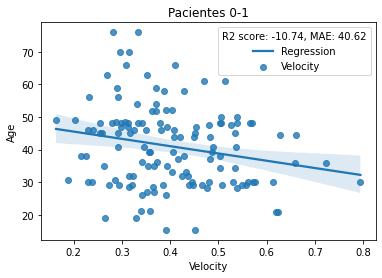

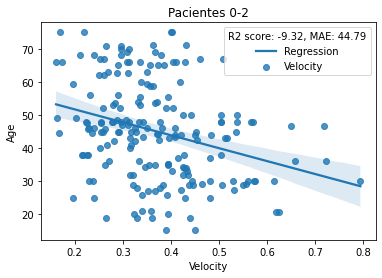

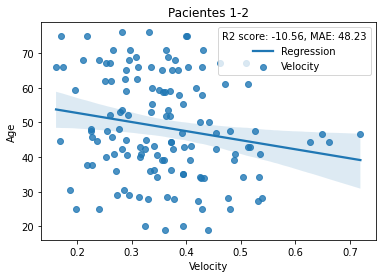

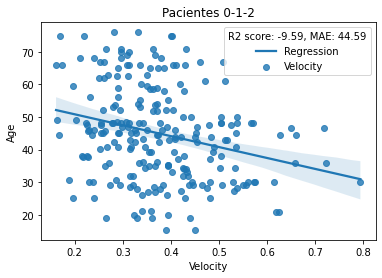

In [73]:
for dsets,title in combinations:
  Plotter(dsets, "Velocity",title)